<a href="https://colab.research.google.com/github/lucasnnobrega/DIP/blob/develop/DIP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução ao Processamento Digital de Imagens**

Prof. Leonardo

Módulo 1 do Trabalho Prático

Data de entrega: **07/08/2019**

Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel). O sistema deve ter a seguinte funcionalidade:

1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)
2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou coloridas (em tons de R, G ou B, respectivamente)
3. Negativo
4. Controle de brilho multiplicativo (s = r.c, c real não negativo) (cuidado com os limites de R, G e B)
5. Convolução m * n com máscara especificada pelo usuário em arquivo texto. Testar com filtros Média e Sobel.
6. Filtro mediana m * n.

O sistema deve ser desenvolvido em uma linguagem de programação de sua escolha. Não use bibliotecas ou funções especiais de processamento de imagens. Para os itens 3 e 4, duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB.

Observações:

O trabalho pode ser feito em grupo, com até seis componentes.

Para integralização das notas, o trabalho deve ser apresentado na data e horário marcados, juntamente com um relatório impresso, contendo pelo menos as seguintes seções: introdução (contextualização e apresentação do tema, fundamentação teórica, objetivos), materiais e métodos (descrição das atividades desenvolvidas e das ferramentas e conhecimentos utilizados) resultados, discussão (problemas e dificuldades encontradas, comentários críticos sobre os resultados) e conclusão. Cada componente do grupo deve estar familiarizado com o trabalho desenvolvido pelos demais componentes do seu grupo, e todos devem comparecer à apresentação dos trabalhos.


In [0]:
# importando algumas bibliotecas 

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# fazendo upload do arquivo da imagem a ser manipulada

uploaded_files = files.upload()

Saving 220px-Lenna_(test_image).png to 220px-Lenna_(test_image) (1).png


In [0]:
# abrindo o arquivo da imagem

lenna = Image.open("220px-Lenna_(test_image).png")

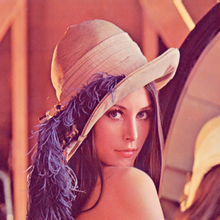

In [18]:
# exibindo a imagem

lenna

In [0]:
# transformando a imagem em um numpy array

lenna_numpy = np.array(lenna)

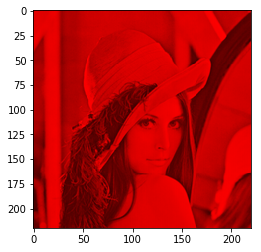

In [35]:
# exibindo a banda vermelha da imagem 

red = np.zeros(lenna_numpy.shape, 'uint8')
red[...,0] = lenna_numpy[...,0]

plt.imshow(red)

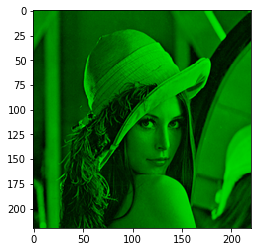

In [34]:
# exibindo a banda verde da imagem 

green = np.zeros(lenna_numpy.shape, 'uint8')
green[...,1] = lenna_numpy[...,1]

plt.imshow(green)

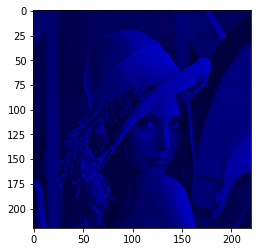

In [66]:
# exibindo a banda azul da imagem 

blue = np.zeros(lenna_numpy.shape, 'uint8')
blue[...,2] = lenna_numpy[...,2]

plt.imshow(blue)

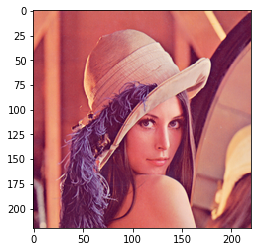

In [30]:
# testando se conseguimos chegar à imagem original
# ao somar as três bandas (vermelho, verde e azul)

plt.imshow(red + green + blue)

**Conversão RGB - YIQ**

Segundo as notas de aula, a conversão RGB - YIQ deve seguir as seguintes fórmulas:

Y = 0.299R + 0.587G + 0.114B

I = 0.596R – 0.274G –0.322B

Q = 0.211R – 0.523G + 0.312B

**Conversão YIQ - RGB**


R = 1.000 Y + 0.956 I + 0.621 Q

G = 1.000 Y – 0.272 I – 0.647 Q

B = 1.000 Y – 1.106 I + 1.703 Q

In [0]:
matriz_RGB_YIQ = np.array([[0.299,0.587,0.114],[0.596,-0.274,-0.322],[0.211,-0.523,0.312]])

In [0]:
matriz_YIQ_RGB = np.array([[1.000,0.956,0.621],[1.000,-0.272,-0.647],[1.000,-1.106,1.703]])

In [0]:
# multiplicar a imagem da Lenna pela matriz de conversão de RGB para YIQ

resultado_conversao_RGB_YIQ = np.dot(lenna_numpy, matriz_RGB_YIQ.copy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


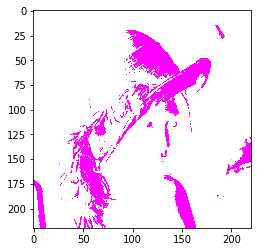

In [84]:
plt.imshow(resultado_conversao_RGB_YIQ)

In [0]:
# multiplicar a imagem da Lenna pela matriz de conversão de YIQ para RGB

resultado_conversao_YIQ_RGB = np.clip( np.dot(resultado_conversao_RGB_YIQ, matriz_YIQ_RGB.copy()), 0, 255 ).astype(np.uint8)

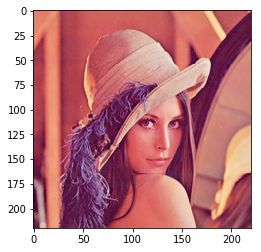

In [86]:
plt.imshow(resultado_conversao_YIQ_RGB)